<a href="https://colab.research.google.com/github/rohammaiti/rohammaiti/blob/main/Labsvc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [29]:
df=pd.read_csv('Iris.csv')

In [30]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
x=df.iloc[:, [1,4]].values
x

array([[5.1, 0.2],
       [4.9, 0.2],
       [4.7, 0.2],
       [4.6, 0.2],
       [5. , 0.2],
       [5.4, 0.4],
       [4.6, 0.3],
       [5. , 0.2],
       [4.4, 0.2],
       [4.9, 0.1],
       [5.4, 0.2],
       [4.8, 0.2],
       [4.8, 0.1],
       [4.3, 0.1],
       [5.8, 0.2],
       [5.7, 0.4],
       [5.4, 0.4],
       [5.1, 0.3],
       [5.7, 0.3],
       [5.1, 0.3],
       [5.4, 0.2],
       [5.1, 0.4],
       [4.6, 0.2],
       [5.1, 0.5],
       [4.8, 0.2],
       [5. , 0.2],
       [5. , 0.4],
       [5.2, 0.2],
       [5.2, 0.2],
       [4.7, 0.2],
       [4.8, 0.2],
       [5.4, 0.4],
       [5.2, 0.1],
       [5.5, 0.2],
       [4.9, 0.1],
       [5. , 0.2],
       [5.5, 0.2],
       [4.9, 0.1],
       [4.4, 0.2],
       [5.1, 0.2],
       [5. , 0.3],
       [4.5, 0.3],
       [4.4, 0.2],
       [5. , 0.6],
       [5.1, 0.4],
       [4.8, 0.3],
       [5.1, 0.2],
       [4.6, 0.2],
       [5.3, 0.2],
       [5. , 0.2],
       [7. , 1.4],
       [6.4, 1.5],
       [6.9,

In [33]:
y=df.iloc[:,5].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [34]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
x_train,  x_test,  y_train, y_test=train_test_split(x, y, test_size=0.2)

In [36]:
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [37]:
y_pred= classifier.predict(x_test)
y_pred

array([2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 2, 1, 1, 0, 1])

In [38]:
y_test

array([2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 0,
       2, 0, 2, 2, 1, 1, 0, 1])

In [39]:
c=0
e=0
for i in range(0, len(y_test)):
    if(y_pred[i]==y_test[i]):
        c=c+1
    else:
        e=e+1
print("Accuracy-",(c/len(y_test))*100)
print("Error-", (e/len(y_test))*100)

Accuracy- 93.33333333333333
Error- 6.666666666666667


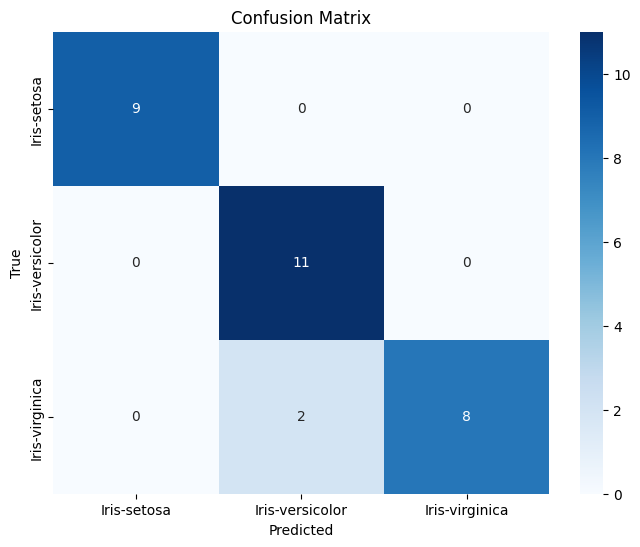

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()